# Preprocessing and Spectrogram Generation 

In [20]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from skimage.transform import resize

# All the audio files have a sample rate of 48000
sr = 48000
# All the audio clips are under 10 seconds
length = 10*sr

# ResNet50 input layer is 224 x 224 x 3, so I'm resizing the image to fit the first input dimension. 
mel_spec_dimensions = (224,224)

data_path = '../Data/'

In [23]:
def generate_melspectrogram(df,file_name):
    df['mspec_db'] = np.nan
    df['mspec_db'] = df['mspec_db'].astype(object)

    for idx,row in df.iterrows():
        wav, sr = librosa.load(data_path + 'train/' + row['recording_id'] + '.flac', sr=None)
    
        # Slicing and centering spectograms 
        m = (int)((row['t_min'] + row['t_max'])*sr/2)
    
        l = (int)(m-(length/2))
        r = (int)(m+(length/2))
    
        #Assumes audio files are at least as long as length
        if l < 0:
            r += l
            l = 0
        elif r > len(wav):
            l -= r-len(wav)
            r = len(wav)
        mspec = librosa.feature.melspectrogram(y=wav[l:r], sr=sr, power=2.0)
        mspec = resize(mspec, mel_spec_dimensions)
        mspec = (mspec - np.min(mspec))/np.max(mspec)
    
        fig, ax = plt.subplots()
        mspec_db = librosa.power_to_db(mspec, ref=np.max)
        img = librosa.display.specshow(mspec_db, x_axis='time', y_axis='mel', sr=sr, ax=ax)
        fig.colorbar(img, ax=ax, format='%+2.0f dB')
        ax.set(title='Mel-frequency spectrogram')
        fig.savefig(data_path+'Melspectrograms/'+file_name+'/'+str(idx)+'.png')
    
        #Should we save power or db? Probably db?
        df.at[idx, 'mspec_db'] = mspec_db
    df.to_csv(data_path+'Melspectrograms/'+file_name+'_melspectograms.csv')

/home/craig/anaconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


FileNotFoundError: [Errno 2] No such file or directory: '../Data/train/00204008d.flac'

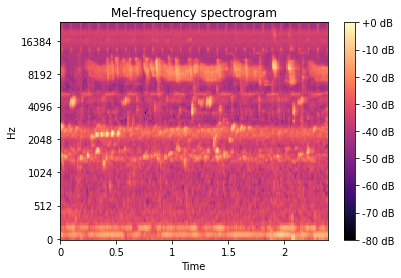

In [24]:
train_tp_df = pd.read_csv(data_path + 'train_tp.csv')
generate_melspectrogram(train_tp_df,'train_tp')
train_fp_df = pd.read_csv(data_path + 'train_fp.csv')
generate_melspectrogram(train_fp_df,'train_fp')